# Assignment: Data Curation and Analysis

## Due Date: 03/01/2023 11:59 PM

The goal of this assignment is to construct, analyze, and publish a dataset on data.worldLinks to an external site. (you need to sign up at https://data.worldLinks to an external site. before starting). All analysis should be performed in a single Jupyter notebook and all data, documentation, and code should be published in a single GitHubLinks to an external site. repository.

The purpose of the assignment is to demonstrate that you can follow best practices for open scientific research in designing and implementing your project, and make your project fully reproducible by others: from data collection to data analysis.

## Step 0: Read about reproducibility

 Read the assigned chapters, Chapters 2 and 3, from The Practice of Reproducible Research (University of California Press, 2018).

Kitzes, J., Turek, D., & Deniz, F. (Eds.). (2018). The practice of reproducible research: case studies and lessons from the data-intensive sciences. Univ of California Press Chapter 2: Assessing ReproducibilityLinks to an external site. and Chapter 3: The Basic Reproducible Workflow

## Step 1: Data extraction

Your assignment is to create an informative graph, starting from scratch, and following best practices for reproducible research. You are allowed to collect data of your choice. For example, you could collect through one of the following means:

Web-data using web-scraping APIs (similar to what we discussed in class)
Twitter data using the Twitter API (e.g., https://python-twitter.readthedocs.io/en/latest/getting_started.htmlLinks to an external site.)
Wikipedia data using the Wikipedia API (e.g., https://pypi.org/project/Wikipedia-API/Links to an external site.)
Survey data with Google Forms or street interviews
 If you use an API/Libraries (e.g.., BeautifulSoup/TwitterAPI/WikipediaAPI) to collect data, please include what API you used and your code that makes API calls. If you choose not to use an API to collect data, note that each of the datasets should have at least 50 data points with at least 4 attributes each. If you are using API/Libraries, the expectation is that you collect data that has more than 200 data points with at least 4 attributes each. In any case, you are, of course, allowed to gather and merge data from different sources, but do cite all the sources and clearly mention your merging criteria.

In [38]:
import pandas
import sys
from bs4 import BeautifulSoup
import requests
opened_webpage = requests.get("https://www.populationu.com/gen/countries-by-gdp")
bs = BeautifulSoup(opened_webpage.content, "html.parser")
raw_data = []

table = bs.find_all("table")
url = 'https://www.populationu.com/gen/countries-by-gdp'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.content, 'html.parser')
tables = soup.find_all('table')
data = []

for row in table:
    line = row.text
    raw_data.append(line)

print(raw_data)

["\n\n\n\nRankCountry20222023 (Billions)2024202520262027\n1United States25,035.16426,185.21027,057.20228,045.30529,165.53130,281.524\n2China18,321.19719,243.97420,699.14822,404.01924,295.36826,437.719\n3Japan4,300.6214,365.9764,568.7294,811.6405,009.9995,172.103\n4Germany4,031.1494,120.2424,337.3854,546.5144,740.7234,925.000\n5India3,468.5663,820.5734,170.2204,547.1644,947.3915,365.546\n6United Kingdom3,198.4703,479.4683,757.4033,969.8874,217.7434,449.753\n7France2,778.0902,806.6902,932.3633,057.2153,179.4633,299.722\n8Canada2,200.3522,326.6202,420.6832,531.2432,630.3422,728.384\n9Russia2,133.0922,136.2222,146.6962,159.1022,195.2082,235.806\n10Brazil1,894.7082,059.4432,200.9162,319.4602,436.7072,568.056\n11Iran1,973.7382,044.1522,135.7312,230.6192,329.9792,438.559\n12Italy1,996.9341,991.0082,059.4102,133.0802,213.7162,289.808\n13South Korea1,734.2071,792.4671,879.0431,961.8302,048.4762,137.201\n14Australia1,724.7871,787.9481,837.6861,913.5231,994.1282,081.613\n15Mexico1,424.5331,476.40

In this step I derived the raw data from the webpage in two forms. One form I used the class method and derived it, and another form I used headers to retrieve the data.

## Step 2: Data transformation and load

Almost always when working with real-world data, we need to process the data to prepare it for analysis. For example, we may wish to convert times or dates, group certain sets of answers together, normalize columns (e.g., convert strings into floats), or any number of other operations. API responses may come in JSON format. Perform what processing steps you see fit to the raw data, ensuring that you keep a copy of the raw data, and save the processed data to a CSV file. This processed data will be the file that you share on data.world.

In [41]:
for table in tables:
    for row in table.find_all('tr'):
        cols = [col.text.strip() for col in row.find_all('td')]
        data.append(cols)

df = pd.DataFrame(data, columns=['Rank', 'Country', '2022', '2023 (Billions)', '2024', '2025', '2026', '2027'])
df = df.replace('n/a', float('nan'))
df.to_csv('Assignment_7_Data_Curation_and_Analysis.csv', index=False)
print(df.head())

df['2022'] = df['2022'].str.replace(',', '')
df['2023 (Billions)'] = df['2023 (Billions)'].str.replace(',', '')
df['2024'] = df['2024'].str.replace(',', '')
df['2025'] = df['2025'].str.replace(',', '')
df['2026'] = df['2026'].str.replace(',', '')
df['2027'] = df['2027'].str.replace(',', '')



   Rank        Country        2022 2023 (Billions)        2024        2025  \
0  None           None        None            None        None        None   
1     1  United States  25,035.164      26,185.210  27,057.202  28,045.305   
2     2          China  18,321.197      19,243.974  20,699.148  22,404.019   
3     3          Japan   4,300.621       4,365.976   4,568.729   4,811.640   
4     4        Germany   4,031.149       4,120.242   4,337.385   4,546.514   

         2026        2027  
0        None        None  
1  29,165.531  30,281.524  
2  24,295.368  26,437.719  
3   5,009.999   5,172.103  
4   4,740.723   4,925.000  


In this step I turned the data into a dataframe and removed the comma from the GDP values to convert it to a float for visualization purposes. I also converted all the n/a to nans.

## Step 3: Analysis: Summary and visualizations

For this assignment, the analysis requested is fairly minimal. We would like to visualize some element of the data collected. This could be a trend over time or a point-in-time comparison. To aid you in choosing what to plot on your graph, consider: what surprised you about your data? What do you think is most important about your data?

Obtain basic descriptive statistics, plot your data using suitable visualization graphs and charts. Make sure that your graphs have descriptive titles; labels for any axes, including units; and legends, wherever needed. All plots should be shown in the Jupyter notebook.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


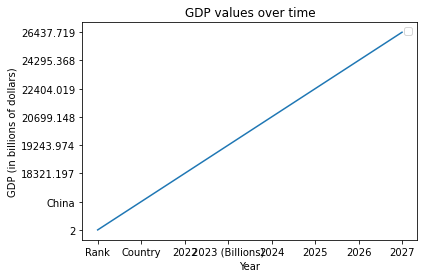

In [42]:
import matplotlib.pyplot as plt


x_labels = list(map(str, df.columns))

df = df.fillna(0)

plt.plot(x_labels, df.iloc[2])
plt.title('GDP values over time')
plt.xlabel('Year')
plt.ylabel('GDP (in billions of dollars)')
plt.legend()
plt.show()




In this step I converted column names to strings, replaced NaN values with zeros, and plotted a graph showing GDP overtime.

## Step 4: Documentation

We will follow best practices for documentation as described in the readings on reproducibility. You need to have documentation in three places: your Jupyter notebook, your README file on GitHub, and with your dataset on data.world.

Your Jupyter notebook should include:

Clear descriptions of each collection and processing step in Markdown sentences, not code comments
Your README should include:

The goal of your project
Links to any relevant API documentation
The license of your data and any source data
A data type and description for each attribute in your data
Any known issues or potential issues, such as sources of bias in collection
Your dataset at data.world should be accompanied by:

A project summary that explains your collection, processing and analysis methods as a high level, as well as links to your GitHub repo
A data dictionary with a data type and description for each attribute in your data

## Step 5: Publication and Submission

Submit your processed data as a CSV file on data.world. Add a brief project description, your project summary, and your data dictionary.

 Create a public GitHub repository for your analysis. Upload your code and data. Add a README and a LICENSE for the repo. The README should include all of your documentation about the data (such as its provenance, any quirks in your data, potential biases, etc.) and the analysis (what you are showing, and why). The LICENSE should be an MIT LicenseLinks to an external site. for your code.

 On Canvas, submit links to your GitHub repo and data.world dataset, as well as the image file of your final visualization.

Tip: someone who stumbles across your GitHub repo should be able to fully reproduce your analysis. In that event, what information would that person want or need? Make sure you include it!